In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#pip install catboost

In [ ]:
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
import xgboost as xg
import catboost as cb
import lightgbm as lgb

# Предобработка данных

В качестве данных для обработки был выбран набор iris. Он содержит следующие столбцы:

* длина чашелистика;
* ширина чашелистика;
* длина лепестка;
* ширина лепестка;
* тип ириса (Setosa, Versicolour и Virginica).


In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
print(X.shape)
print()
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(150, 4)

(112, 4)
(112,)

(38, 4)
(38,)


#Decision Tree

In [ ]:
#Построить дерево решений для задачи классификации или регрессии.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.8517073170731707


[Text(0.3181818181818182, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [37, 39, 36]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.4090909090909091, 0.75, 'x[2] <= 4.75\ngini = 0.499\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.36363636363636365, 0.25, 'x[3] <= 1.6\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),

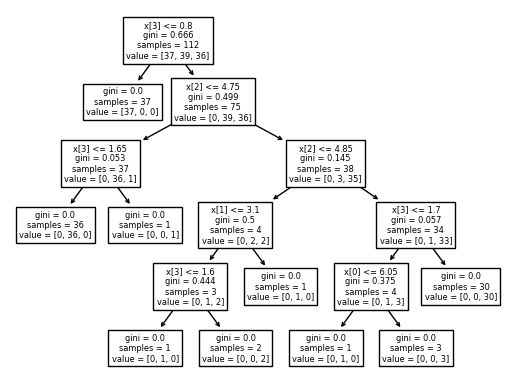

In [ ]:
plot_tree(model)

In [ ]:
#Подобрать гиперпараметры дерева, используя GridSearchCV.
param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'max_leaf_nodes': [None, 5, 10, 15, 20]
}
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params)

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 1}


In [ ]:
# Построить классификатор дерева решений с лучшими гиперпараметрами
best_tree = DecisionTreeClassifier(**best_params)

# Обучите классификатор дерева решений своими данными
best_tree.fit(X_train, y_train)

# Оцените качество модели (например, используя показатель точности)
y_pred = best_tree.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.8887804878048781


[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [37, 39, 36]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.75\ngini = 0.499\nsamples = 75\nvalue = [0, 39, 36]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.145\nsamples = 38\nvalue = [0, 3, 35]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.875, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

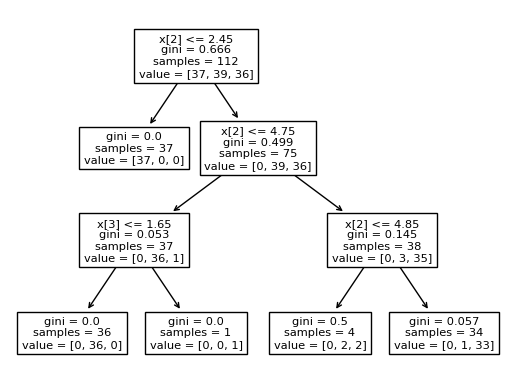

In [ ]:
# Отрисовка дерева
plot_tree(best_tree)

# Ансамбли

## Стекинг


In [ ]:
# Реализовать ансамбли моделей (стекинг, бэггинг, бустинг) для решения
# задачи классификации или регрессии

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

estimators = [
    ('knn', KNeighborsClassifier()),
    ('tree', DecisionTreeClassifier()),
    ('svc', SVC())
]

# Создание классификатора стекинга
stacking = StackingClassifier(estimators=estimators)

# Обучение модели
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier()),
                               ('tree', DecisionTreeClassifier()),
                               ('svc', SVC())])

In [ ]:
y_pred = stacking.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.9629268292682926


## Бэггинг


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Определение базовой модели
base_estimator = DecisionTreeClassifier()

# Создание классификатора бэггинга
bagging_clf = RandomForestClassifier()

# Обучение модели
bagging_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = stacking.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.9629268292682926


## Бустинг


In [ ]:
# Обучение модели XGBoost
xg_clf = xg.XGBClassifier()
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = xg_clf.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.8517073170731707


In [ ]:
# Обучение модели LightGBM
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 4
[LightGBM] [Info] Start training from score -1.107581
[LightGBM] [Info] Start training from score -1.054937
[LightGBM] [Info] Start training from score -1.134980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier()

In [ ]:
y_pred = lgb_clf.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.8517073170731707


In [ ]:
# Обучение модели catboost
cb_clf = cb.CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.070767
0:	learn: 1.0135033	total: 3.61ms	remaining: 3.6s
1:	learn: 0.9425653	total: 4.65ms	remaining: 2.32s
2:	learn: 0.8879617	total: 5.44ms	remaining: 1.81s
3:	learn: 0.8296254	total: 6.21ms	remaining: 1.55s
4:	learn: 0.7718450	total: 6.93ms	remaining: 1.38s
5:	learn: 0.7201983	total: 7.68ms	remaining: 1.27s
6:	learn: 0.6850906	total: 8.45ms	remaining: 1.2s
7:	learn: 0.6529243	total: 9.19ms	remaining: 1.14s
8:	learn: 0.6143025	total: 9.94ms	remaining: 1.09s
9:	learn: 0.5777695	total: 10.7ms	remaining: 1.06s
10:	learn: 0.5524541	total: 11.4ms	remaining: 1.03s
11:	learn: 0.5278005	total: 12.2ms	remaining: 1s
12:	learn: 0.5047682	total: 12.9ms	remaining: 980ms
13:	learn: 0.4802008	total: 13.8ms	remaining: 969ms
14:	learn: 0.4548946	total: 14.5ms	remaining: 954ms
15:	learn: 0.4350143	total: 15.2ms	remaining: 937ms
16:	learn: 0.4144443	total: 16.1ms	remaining: 933ms
17:	learn: 0.3999557	total: 17.6ms	remaining: 962ms
18:	learn: 0.3842460	total: 18.3ms	remaining: 946

In [ ]:
y_pred = cb_clf.predict(X_test)
print('r2_score:', r2_score(y_test, y_pred))

r2_score: 0.8887804878048781
